<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/logo.png?raw=1" width="800">

Made by **Balázs Nagy** and **Márk Domokos**

[<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/open_button.png?raw=1">](https://colab.research.google.com/github/Fortuz/edu_Adaptive/blob/main/practices/L08%20-%20Regularization_solved.ipynb)

# Labor 08 - Regularisation of Linear Regression and Bias - Variance

### Water flow

In the first part of the exercise, a linear regression is implemented to predict the amount of water spilled from a tank based on how much water is in the tank. In the second half of the exercise, we observe the debugging of the learning algorithms and the bias and variance type errors.

### 1: Import, load and visualise data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as op

# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import optimizers


from numpy.random import seed
# Since this nootebook contains a random initialization it is advised to fix the seed, to get always the same random results
seed(1)

### 2: Load data

The data will be loaded from a publicly available file. An alternative solution would be to upload the data file directly to the google colab file system.

In [4]:
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab08/Lab8data.mat
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab08/w_final.txt

--2025-01-11 09:26:45--  https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab08/Lab8data.mat
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab08/Lab8data.mat [following]
--2025-01-11 09:26:45--  https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab08/Lab8data.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1321 (1.3K) [application/octet-stream]
Saving to: ‘Lab8data.mat’

Lab8data.mat        100%[===================>]   1.29K  --.-KB/s    in 0s      

2025-01-11 09:26:45 (182 MB/s) - ‘Lab8data.mat’ saved [13

Load in the data! Use the Pandas package to do this and then convert it into a numpy array.

In [5]:
data = loadmat("Lab8data.mat")
X_train = data["X"]
Y_train = data["y"]
X_val   = data["Xval"]
Y_val   = data["yval"]
X_test  = data["Xtest"]
Y_test  = data["ytest"]

del data
m,n = X_train.shape
print('Shape of X:', X_train.shape)
print('Shape of Y:', Y_train.shape)

Shape of X: (12, 1)
Shape of Y: (12, 1)


### 3: Visualization

Let's vizualise the data set to understand it more.

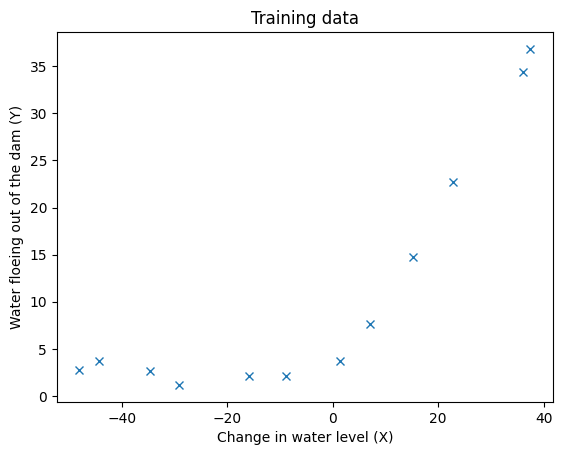

In [6]:
plt.plot(X_train,Y_train,'x')
plt.title('Training data')
plt.xlabel('Change in water level (X)')
plt.ylabel('Water floeing out of the dam (Y)')
plt.show()

Machine learning goes as far as deep learning. The limit is the single layer neural network. With this in mind, let's return to the punishment process introduced in lab L04, now using neural network packages.

### Linearized regression with regularization

We will create a network corresponding to a linear regression, which in our case will be based on 1 input variable and will consist of 1 layer containing 1 neuron. The BIAS tag will be added naturally and a penalty tag will be added. Two commonly used penalty methods are L1 and L2.

#### L2 regularization (Ridge regression)
$ C(w)=\frac{1}{2m}\sum_{i=1}^m(h_w(x^i)-y^i)^2+ \color{red}{\lambda\sum_{j=1}^nw_j^2} $

This technique can be used to prevent over fitting. $\lambda $  should be choosen wisely. Setting it too high can result in under fitting.

#### L1 regularization (Lasso regression)
$ C(w)=\frac{1}{2m}\sum_{i=1}^m(h_w(x^i)-y^i)^2+ \color{red}{\lambda\sum_{j=1}^n|w_j|} $

This technique can also reduce certain coefficients to 0, so it is useful for input parameter selection.

In [9]:
# Underfit Case
Lambda = 0
lr_rate = 0.005
epoch = 100

# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(1, input_shape=(1,), use_bias=True, kernel_regularizer=regularizers.l2(Lambda)))

# compiling the sequential model
sgd = optimizers.Adam(learning_rate=lr_rate)
model.compile(loss='MSE', optimizer=sgd)

# training the model and saving metrics in history
history = model.fit(X_train, Y_train, epochs=epoch, validation_data=(X_val, Y_val), verbose = 2)

Epoch 1/100


/usr/local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 0s - 277ms/step - loss: 3114.5706 - val_loss: 3258.0364
Epoch 2/100
1/1 - 0s - 35ms/step - loss: 3098.8584 - val_loss: 3241.6426
Epoch 3/100
1/1 - 0s - 34ms/step - loss: 3083.1895 - val_loss: 3225.2947
Epoch 4/100
1/1 - 0s - 34ms/step - loss: 3067.5642 - val_loss: 3208.9941
Epoch 5/100
1/1 - 0s - 34ms/step - loss: 3051.9834 - val_loss: 3192.7402
Epoch 6/100
1/1 - 0s - 37ms/step - loss: 3036.4480 - val_loss: 3176.5356
Epoch 7/100
1/1 - 0s - 36ms/step - loss: 3020.9587 - val_loss: 3160.3794
Epoch 8/100
1/1 - 0s - 35ms/step - loss: 3005.5156 - val_loss: 3144.2734
Epoch 9/100
1/1 - 0s - 32ms/step - loss: 2990.1204 - val_loss: 3128.2175
Epoch 10/100
1/1 - 0s - 32ms/step - loss: 2974.7722 - val_loss: 3112.2129
Epoch 11/100
1/1 - 0s - 32ms/step - loss: 2959.4736 - val_loss: 3096.2598
Epoch 12/100
1/1 - 0s - 33ms/step - loss: 2944.2234 - val_loss: 3080.3589
Epoch 13/100
1/1 - 0s - 32ms/step - loss: 2929.0234 - val_loss: 3064.5112
Epoch 14/100
1/1 - 0s - 31ms/step - loss: 2913.8738 - val_

Let's do the prediction.

In [11]:
################### CODE HERE ########################
# Implement the prediction step.
# Use the predict() function of the model
def prediction_step(model, X_test):
    Y_pred = model.predict(X_test)
    return Y_pred
Y_pred = prediction_step(model, X_test)
######################################################

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Plot the result.

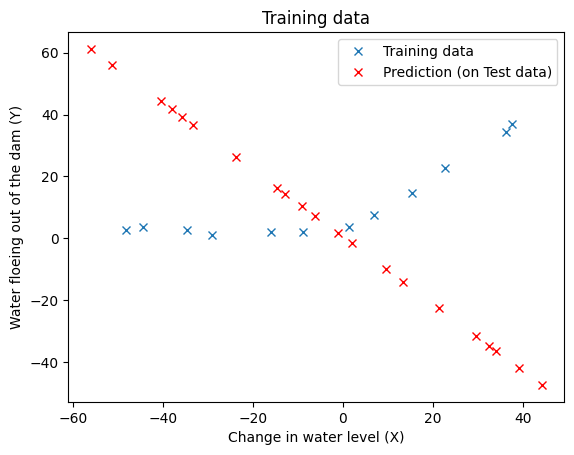

In [12]:
plt.plot(X_train,Y_train,'x')   # adatok megjelenítése
plt.plot(X_test,Y_pred,'x', color='red')   # adatok megjelenítése
plt.title('Training data')
plt.xlabel('Change in water level (X)')
plt.ylabel('Water floeing out of the dam (Y)')
plt.legend(['Training data', 'Prediction (on Test data)'])
plt.show()

In line with our expectations and our simple model design, we obtained a linear estimate that does not seem to adequately capture our data. Using the built-in metrics, we can examine the running of the cost function on the training and validation data. To do this, we first plot the corresponding metrics.

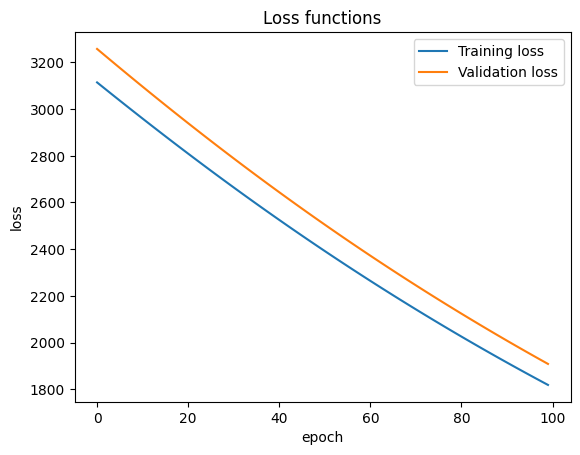

In [13]:
# plotting the metrics
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss functions')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'])

In the graph, we can observe that both the cost function of the training data and the cost function of the validation data remain high. Higher than one would expect from a well-functioning predictor.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab08/Pics/L08_HighBias.png?raw=1" width="600">

So let's change our model to get a better result.

### 4: Poly Feature

To get a better result, we need more input parameters. One possible way to generate more parameters is to take the polynomial coefficients of the available parameter and feed them into your neural network as additional parameters.

Write a function that takes as input the matrix of actual samples and enriches it with the appropriate columns up to the desired exponent. $x => x, x^2, x^3 ... x^p$

In [20]:
def polyFeatures(X,p=9):
    ################### CODE HERE ########################
    # Implement the feature extension for the input data
    X_poly = np.hstack([X ** i for i in range(1, p + 1)])
    ######################################################
    return X_poly

Do not forget to lower the values, otherwise the high exponent members would distort the learning very much. Write a normalization function that takes a sample matrix as input and returns the means and variances as a vector in addition to the normalized matrix.

In [24]:
def featureNormalize(X):
    ################### CODE HERE ########################
    # Normalize the features of the input data.
    # Each features has different normalization values.
    avg = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=0)

    X_norm = (X - avg) / std

    ######################################################
    return X_norm,avg,std

Perform both the polynomial variable enrichment and the normalization.

$\color{red}{Warning!}$

You should be aware of that during training you only want to use information from the training data set. This means that we should also normalise the test and validation data using the mean and standard deviation calculated from the training data. Otherwise, we would leak data back to the algorithm that could distort the learning result. The validation and test datasets thus remain truly independent and the algorithm can only work with the information obtained from the training data.

In [40]:
order=9

# Training data
X_train_p = polyFeatures(X_train, order)                                # polynomial features
X_train_pn, mu, sigma = featureNormalize(X_train_p)                     # feature normalization

################### CODE HERE ########################
# Perform the feature extension and normalization for the remaining data sets as well
 
# Validation data

X_val_p = polyFeatures(X_val, order)
X_val_pn = (X_val_p-mu)/sigma

# Test data

X_test_p = polyFeatures(X_test, order)
X_test_pn  = (X_test_p-mu)/sigma

######################################################

print("""Expected Normalized Training Example for order=3 (approx.):
[-0.362 -0.755  0.182 ]""")
print('Normalized Training Example 1:\n',X_train_pn[0,:])

Expected Normalized Training Example for order=3 (approx.):
[-0.362 -0.755  0.182 ]
Normalized Training Example 1:
 [-0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197 -0.6171516
  0.35983501 -0.53109126  0.37553696]


Set the parameters.

In [41]:
# Just Right Case
Lambda = 0
lr_rate = 0.01
epoch = 100
optim = optimizers.SGD(learning_rate=lr_rate)

Since we have increased the number of variables, we need to modify our model. The input layer should fit the size of our increased input matrix, but we still only want one output.

In [42]:
# Building a linear stack of layers with the sequential model
model2 = Sequential()

################### CODE HERE ########################
# Build a 2 layer Neural Network matching the input shape of the data and producing 1 output.
# Use BIAS and L2 regularization.

model2.add(Dense(9, input_shape=(9,), use_bias=True, kernel_regularizer=regularizers.l2(Lambda)))
model2.add(Dense(1, input_shape=(9,), use_bias=True, kernel_regularizer=regularizers.l2(Lambda)))

######################################################

/usr/local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


After the architecture of the model is established, the model is compiled and the cost function and the optimizer are defined. Again, there are several options to choose from, such as SGD or ADAM.

In [43]:
# Compiling the sequential model
# optim = optimizers.SGD(lr=lr_rate)
optim = optimizers.Adam(learning_rate=lr_rate)
model2.compile(loss='MSE', optimizer=optim)

# Training the model and saving metrics in history
history2 = model2.fit(X_train_pn, Y_train, epochs=epoch, validation_data=(X_val_pn, Y_val), verbose = 2)

Epoch 1/100


1/1 - 1s - 503ms/step - loss: 268.2845 - val_loss: 311.1584
Epoch 2/100
1/1 - 0s - 34ms/step - loss: 264.9356 - val_loss: 306.7463
Epoch 3/100
1/1 - 0s - 33ms/step - loss: 261.5661 - val_loss: 302.2404
Epoch 4/100
1/1 - 0s - 33ms/step - loss: 258.1588 - val_loss: 297.6011
Epoch 5/100
1/1 - 0s - 33ms/step - loss: 254.6977 - val_loss: 292.7734
Epoch 6/100
1/1 - 0s - 33ms/step - loss: 251.1706 - val_loss: 287.7098
Epoch 7/100
1/1 - 0s - 34ms/step - loss: 247.5650 - val_loss: 282.3999
Epoch 8/100
1/1 - 0s - 34ms/step - loss: 243.8691 - val_loss: 276.8611
Epoch 9/100
1/1 - 0s - 37ms/step - loss: 240.0751 - val_loss: 271.1161
Epoch 10/100
1/1 - 0s - 36ms/step - loss: 236.1795 - val_loss: 265.1856
Epoch 11/100
1/1 - 0s - 33ms/step - loss: 232.1814 - val_loss: 259.0868
Epoch 12/100
1/1 - 0s - 32ms/step - loss: 228.0819 - val_loss: 252.8353
Epoch 13/100
1/1 - 0s - 33ms/step - loss: 223.8828 - val_loss: 246.4457
Epoch 14/100
1/1 - 0s - 33ms/step - loss: 219.5866 - val_loss: 239.9326
Epoch 15/100

After training the model, we make this prediction on our test data.

In [44]:
################### CODE HERE ########################
# Calculate the predictions using the recently trained model.

Y_pred2 = prediction_step(model2, X_test_pn)

######################################################

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Let's plot the result of the prediction.

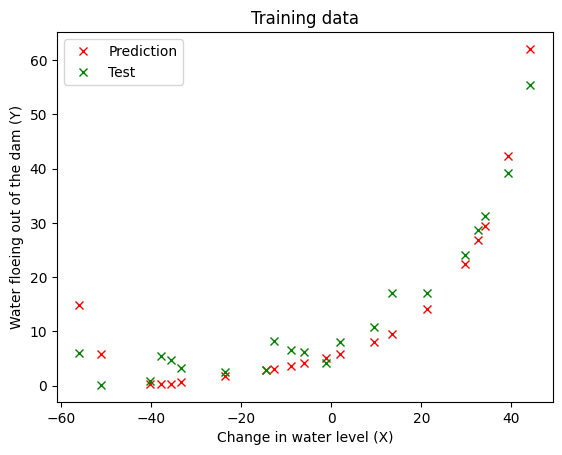

In [45]:
plt.plot(X_test,Y_pred2,'x', color="red")
plt.plot(X_test,Y_test,'x', color="green")
plt.title('Training data')
plt.xlabel('Change in water level (X)')
plt.ylabel('Water floeing out of the dam (Y)')
plt.legend(['Prediction', 'Test'])
plt.show()

You can see that the extended model gives a much better result, which fits our data much better. The result is also reflected in the metrics.

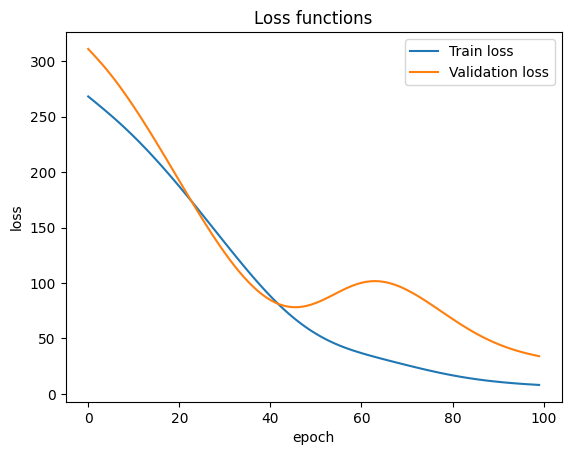

In [46]:
# plotting the metrics
fig = plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss functions')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'])

Both the cost function of our training data and the cost function of our validation data were significantly lower than in our first attempt.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab08/Pics/L08_HighBias.png?raw=1" width="600">

You can extend your model further and tune the hyperparameters, but be careful not to fall into the trap of over-learning, as in the model below.

In our case, we chose too many input parameters and ran the learning that way.

In [47]:
#Overfit
Lambda = 0
lr_rate = 0.001
epoch = 100
order=12
optim = optimizers.Adam(learning_rate=lr_rate)

In [48]:
# Train
X_train_p = polyFeatures(X_train, order)                                # polynomial features
X_train_pn, mu, sigma = featureNormalize(X_train_p)                     # feature normalization

# Validation
X_val_p = polyFeatures(X_val, order)
X_val_pn = (X_val_p-mu)/sigma

# Test
X_test_p = polyFeatures(X_test, order)
X_test_pn = (X_test_p-mu)/sigma

In [49]:
# Building a linear stack of layers with the sequential model
model3 = Sequential()
model3.add(Dense(order, input_shape=(order,), use_bias=True, kernel_regularizer=regularizers.l2(Lambda)))
model3.add(Dense(1))

In [51]:
# compiling the sequential model
optim = optimizers.SGD(learning_rate=lr_rate)
model3.compile(loss='MSE', optimizer=optim)

# training the model and saving metrics in history
history3 = model3.fit(X_train_pn, Y_train, epochs=epoch, validation_data=(X_val_pn, Y_val), verbose = 2)

Epoch 1/100


1/1 - 0s - 206ms/step - loss: 269.2619 - val_loss: 298.9593
Epoch 2/100
1/1 - 0s - 36ms/step - loss: 263.6689 - val_loss: 292.7217
Epoch 3/100
1/1 - 0s - 38ms/step - loss: 258.2743 - val_loss: 286.6251
Epoch 4/100
1/1 - 0s - 38ms/step - loss: 253.0300 - val_loss: 280.6270
Epoch 5/100
1/1 - 0s - 36ms/step - loss: 247.8979 - val_loss: 274.6935
Epoch 6/100
1/1 - 0s - 37ms/step - loss: 242.8483 - val_loss: 268.7984
Epoch 7/100
1/1 - 0s - 36ms/step - loss: 237.8575 - val_loss: 262.9208
Epoch 8/100
1/1 - 0s - 36ms/step - loss: 232.9065 - val_loss: 257.0446
Epoch 9/100
1/1 - 0s - 36ms/step - loss: 227.9810 - val_loss: 251.1573
Epoch 10/100
1/1 - 0s - 38ms/step - loss: 223.0690 - val_loss: 245.2494
Epoch 11/100
1/1 - 0s - 35ms/step - loss: 218.1617 - val_loss: 239.3138
Epoch 12/100
1/1 - 0s - 33ms/step - loss: 213.2522 - val_loss: 233.3454
Epoch 13/100
1/1 - 0s - 34ms/step - loss: 208.3348 - val_loss: 227.3409
Epoch 14/100
1/1 - 0s - 35ms/step - loss: 203.4056 - val_loss: 221.2979
Epoch 15/100

In [52]:
Y_pred3 = model3.predict(X_test_pn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


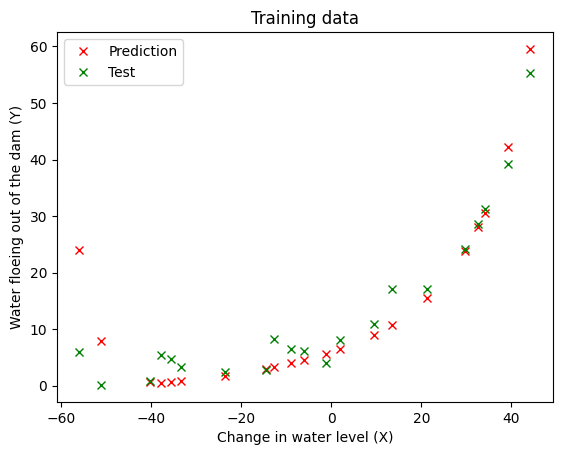

In [53]:
plt.plot(X_test,Y_pred3,'x', color="red")
plt.plot(X_test,Y_test,'x', color="green")
plt.title('Training data')
plt.xlabel('Change in water level (X)')
plt.ylabel('Water floeing out of the dam (Y)')
plt.legend(['Prediction', 'Test'])
plt.show()

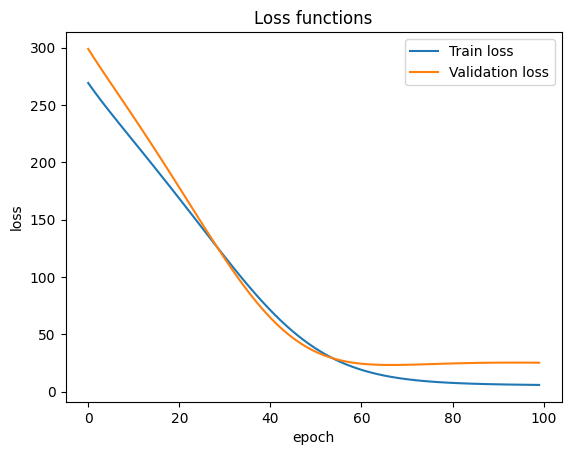

In [54]:
# plotting the metrics
fig = plt.figure()
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss functions')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'])

It can be seen that the model learns too much on the training samples and after the 60th epoch the cost function of the training samples continues to decrease, but the result on the validation samples starts to deteriorate. This means that although the cost function of the training samples performs well below an expected level, the cost function of the validation and test samples will be well above the expected result. The "scissors are open", there will be a large gap between the two cost functions.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab08/Pics/L08_HighVariance.png?raw=1" width="600">

### 5: Summary and Tips

Underfitting (High Bias problem):
- Adding more input parameters to the model (either independent or polynomial).
- $\lambda$ parameter reduction, i.e. less penalization.
- Increase the epoch number.
- Increase $\alpha$ (learning rate).

Overfitting (High Variance problem):
- Less input parameter.
- Increase the $\lambda$ parameter, i.e. we penalize more.
- More learning samples.
- Reducing $\alpha$ (learning rate).

<div style="text-align: right">This lab exercise uses elements from Andrew Ng's Machine Learning course.</div>